<a href="https://colab.research.google.com/github/alslmini/Machine-Learning-Programming/blob/main/20250916%EC%8B%A4%EC%8A%B5/20250916_Rasin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# -----------------------------
# 0) 라이브러리 준비
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Machine-Learning/20250916/data/Raisin_Dataset.xlsx", header=0).dropna()
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [38]:
#레이블 확인
df['Class'].value_counts()

,count
Class,
Kecimen,450
Besni,450


Text(0.5, 1.0, 'Rasins')

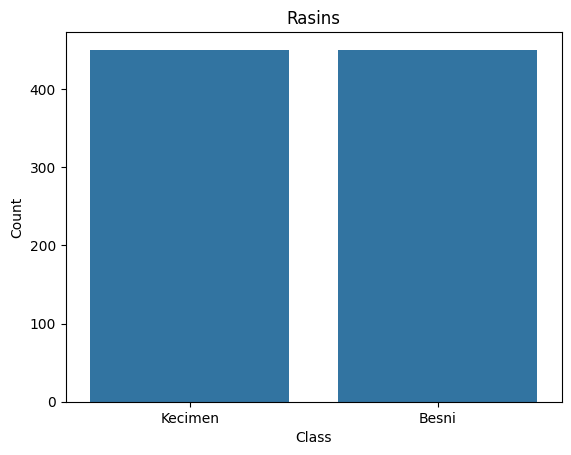

In [41]:
#레이블 갯수 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Class")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Rasins")

In [42]:
# 결측치 확인
df.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [43]:
# 결측치 제거
df=df.dropna()
df.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [24]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [44]:
# 컬럼이름 확인
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [45]:
# 모든 레이블을 숫자로 변형
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [46]:
# 입력과 출력 분리

X = df.drop(columns=["Class"])
y = df["Class"]

In [26]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [27]:
y

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


In [47]:
# 훈련과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 7), (180, 7), (720,), (180,))

In [48]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=1000, solver='liblinear')

In [49]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [51]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [52]:
# 정답값
y_test

,Class
502,0
637,0
701,0
237,1
707,0
...,...
499,0
538,0
780,0
702,0


In [53]:
#예측값
dt_y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1])

In [54]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.8444
[[71 19]
 [ 9 81]]
=== RF Test Accuracy ===
Random Forest : 0.8722
[[72 18]
 [ 5 85]]
=== LR Test Accuracy ===
Logistic Reg. : 0.8944
[[77 13]
 [ 6 84]]
